In [144]:
from onset.similarity import calc_accuracy_as_dataframe
from onset.utilities.graph_utils import read_json_graph
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
G_path = "/home/matt/src/topology-programming/data/graphs/json/regional/ground_truth_regional.json"
H_path = "/home/matt/src/topology-programming/data/graphs/json/regional/reconstruction_regional.json"

In [232]:
G = read_json_graph(G_path, stringify=True)
H = read_json_graph(H_path, stringify=True)

In [233]:
acc_df = calc_accuracy_as_dataframe(G, H)


In [237]:
X = [x for x in acc_df['level_0']]
Y = [y for y in acc_df['level_1']]
edge = [(x, y) for (x, y) in zip(X, Y)]
acc_df["edge"] = edge
acc_df["% error"] = (abs((acc_df["H betweenness"] - acc_df["G betweenness"]) / acc_df["G betweenness"]))
acc_df.replace(np.inf, 1, inplace=True)
acc_df.fillna(0, inplace=True)
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted", "% error"]]

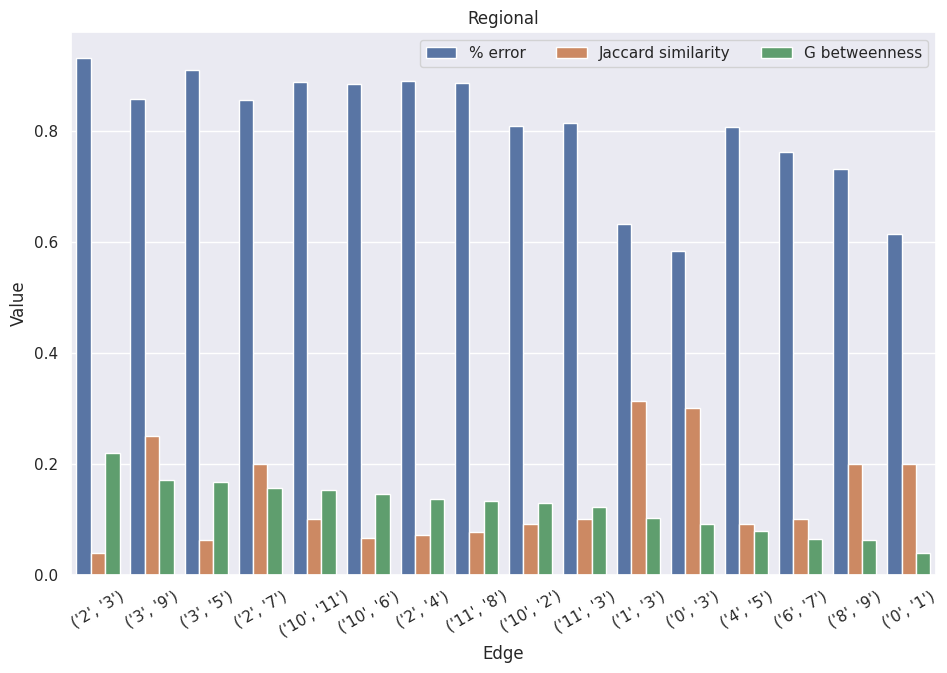

In [260]:
vars = ["edge", "% error", "Jaccard similarity", "G betweenness"]
anchor_var = "G betweenness"
similarity = holy_simularity[vars]
similarity = similarity.sort_values(anchor_var, ascending=False)
similarity = similarity[similarity["G betweenness"] > 0]
similarity = similarity[similarity["% error"] < 1]
similarity = similarity.melt(id_vars='edge').rename(columns=str.title)
similarity


sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})
sns.barplot(similarity, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=3, title="")
plt.title("Regional")
plt.show()

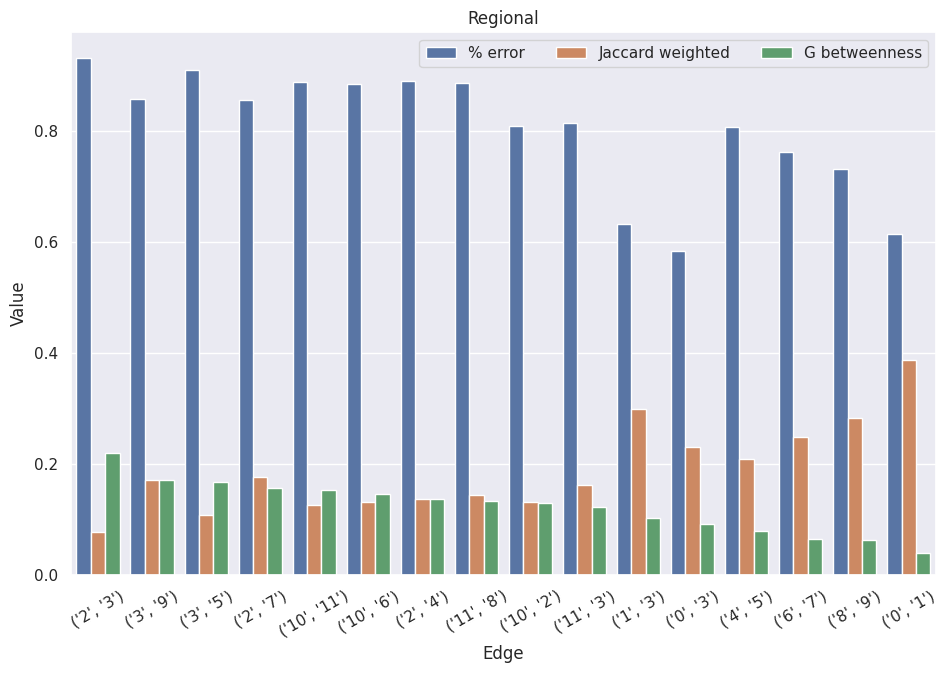

In [261]:
vars = ["edge", "% error", "Jaccard weighted", "G betweenness"]
anchor_var = "G betweenness"
similarity = holy_simularity[vars]
similarity = similarity.sort_values(anchor_var, ascending=False)
similarity = similarity[similarity["G betweenness"] > 0]
similarity = similarity[similarity["% error"] < 1]
similarity = similarity.melt(id_vars='edge').rename(columns=str.title)
similarity


sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})
sns.barplot(similarity, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=3, title="")
plt.title("Regional")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, "('8', '9')"),
  Text(1, 0, "('3', '5')"),
  Text(2, 0, "('6', '7')"),
  Text(3, 0, "('2', '3')"),
  Text(4, 0, "('4', '5')"),
  Text(5, 0, "('0', '1')"),
  Text(6, 0, "('11', '8')"),
  Text(7, 0, "('2', '4')"),
  Text(8, 0, "('0', '3')"),
  Text(9, 0, "('10', '2')"),
  Text(10, 0, "('3', '9')"),
  Text(11, 0, "('10', '11')"),
  Text(12, 0, "('10', '6')"),
  Text(13, 0, "('1', '10')"),
  Text(14, 0, "('1', '3')"),
  Text(15, 0, "('0', '11')"),
  Text(16, 0, "('11', '3')"),
  Text(17, 0, "('2', '7')")])

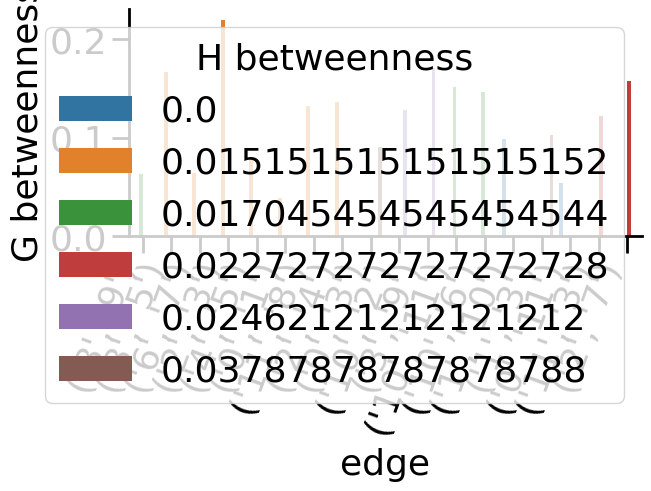

In [56]:
this_series = acc_df[acc_df["G betweenness"] > 0]
sns.barplot(acc_df[acc_df["G betweenness"] > 0], x=this_series["edge"], y=this_series["G betweenness"], hu)
plt.xticks(rotation=70, horizontalalignment='right')

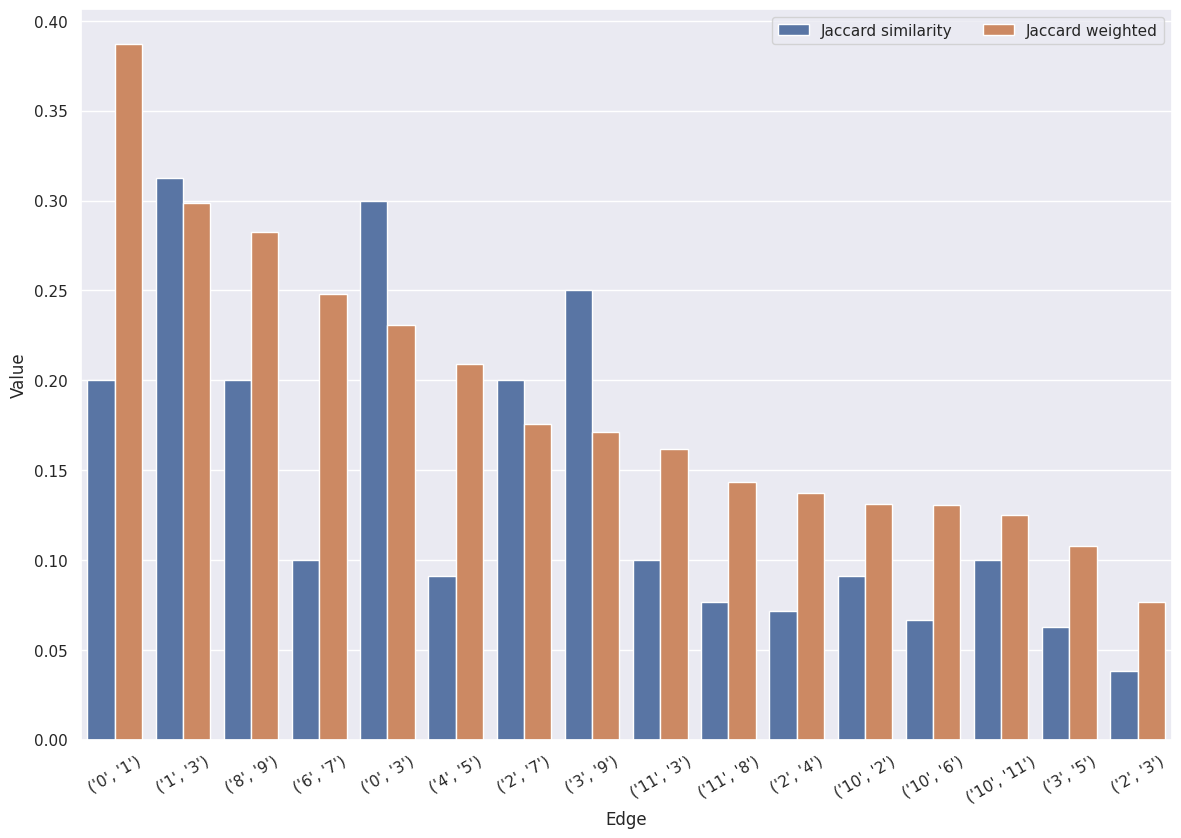

In [118]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
jacard_similarity = acc_df[["edge", "Jaccard similarity", "Jaccard weighted"]]
jacard_similarity = jacard_similarity.sort_values("Jaccard weighted", ascending=False)
jacard_similarity = jacard_similarity[jacard_similarity["Jaccard weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_jac = jacard_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_jac
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_jac, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=2, title="")

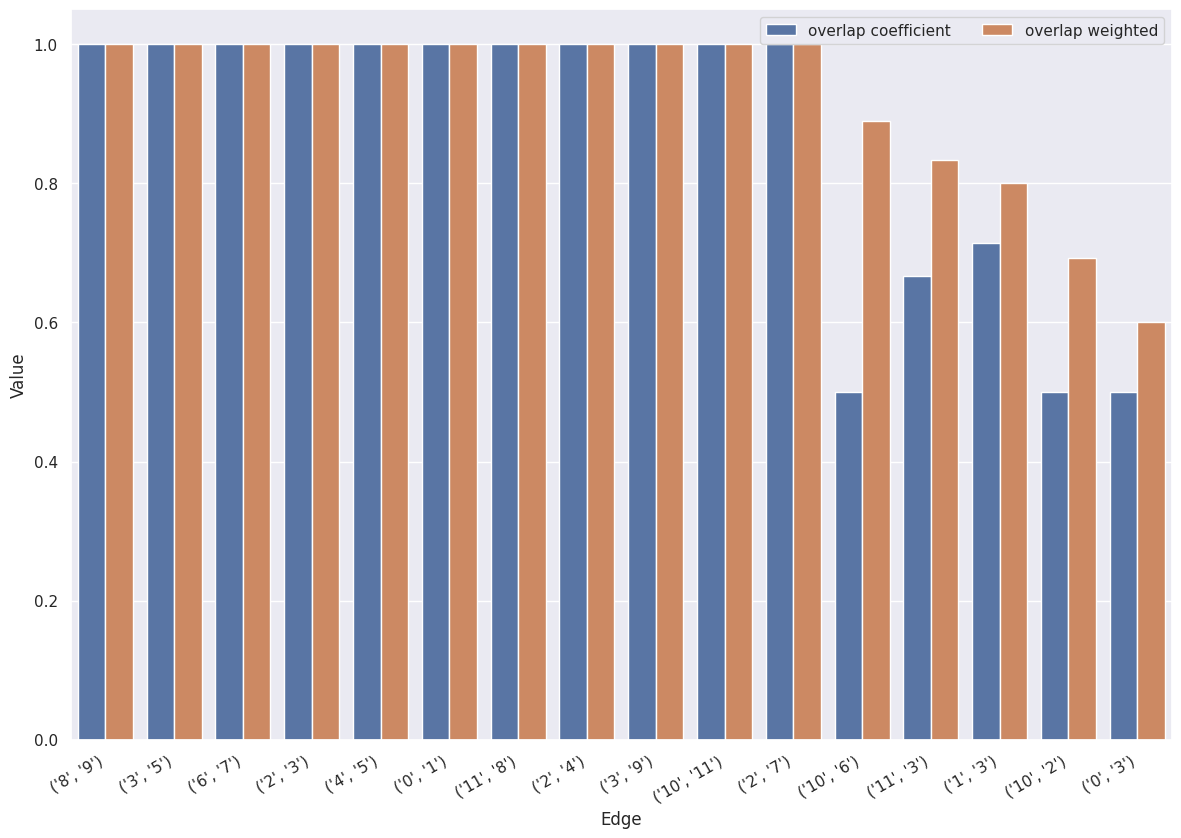

In [117]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
overlap_similarity = acc_df[["edge", "overlap coefficient", "overlap weighted"]]
overlap_similarity = overlap_similarity.sort_values("overlap weighted", ascending=False)
overlap_similarity = overlap_similarity[overlap_similarity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_overlap = overlap_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_overlap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_overlap, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30, horizontalalignment='right')
plt.legend(ncol=2, title="")

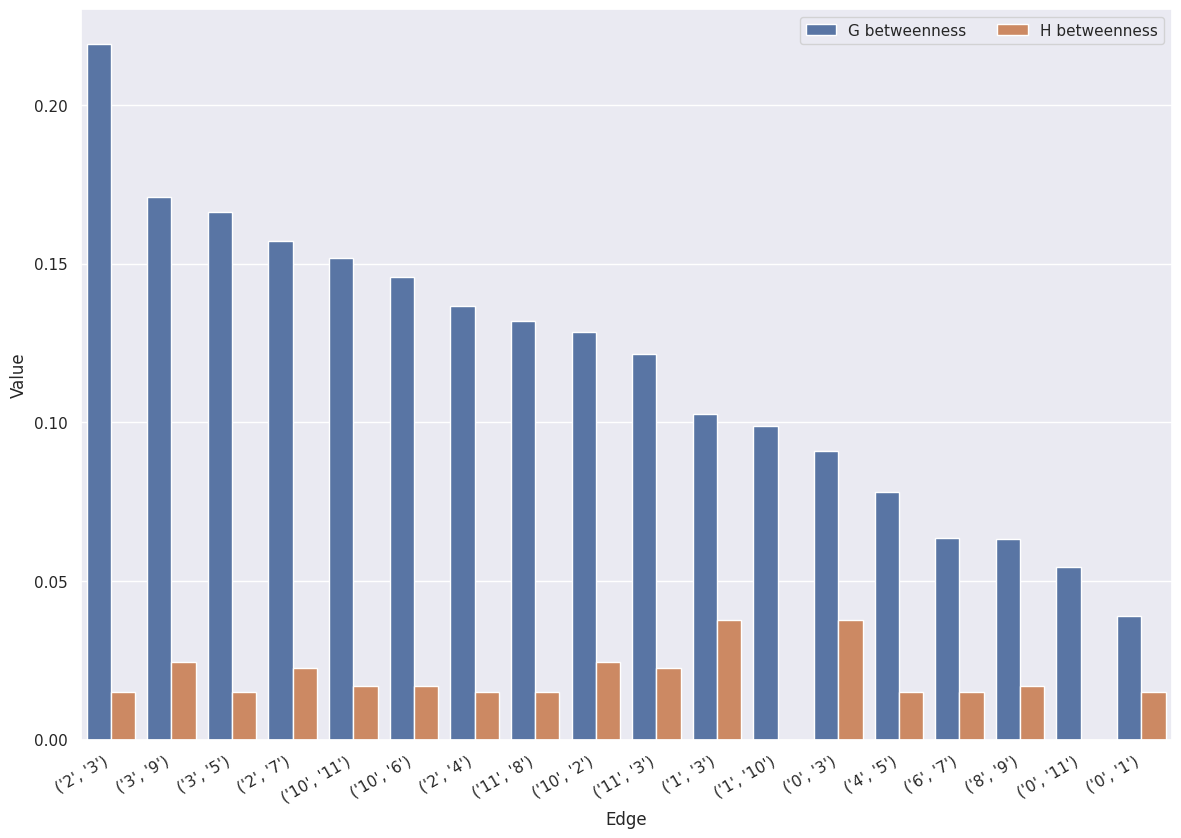

In [126]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
betweenness_similarity = acc_df[["edge", "G betweenness", "H betweenness"]]
betweenness_similarity = betweenness_similarity.sort_values("G betweenness", ascending=False)
betweenness_similarity = betweenness_similarity[betweenness_similarity["G betweenness"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_betweenness = betweenness_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_betweenness
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_betweenness, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30, horizontalalignment='right')
plt.legend(ncol=2, title="")

In [229]:
similarity = acc_df[["edge", "G betweenness", "H betweenness"]]
similarity = similarity.sort_values("G betweenness", ascending=False)
similarity = similarity[similarity["G betweenness"] > 0]
similarity

,edge,G betweenness,H betweenness
8,"(2, 3)",0.219192,0.015152
33,"(3, 9)",0.170960,0.024621
1,"(3, 5)",0.166414,0.015152
50,"(2, 7)",0.157071,0.022727
35,"(10, 11)",0.151768,0.017045
38,"(10, 6)",0.145960,0.017045
22,"(2, 4)",0.136616,0.015152
20,"(11, 8)",0.132071,0.015152
26,"(10, 2)",0.128535,0.024621
48,"(11, 3)",0.121465,0.022727


In [123]:
acc_df.columns

Index(['level_0', 'level_1', 'G flows', 'num G flows', 'H flows',
       'num H flows', 'union', 'size union', 'intersection',
       'size intersection', 'G betweenness', 'H betweenness',
       'Jaccard similarity', 'overlap coefficient', 'G flow_weights',
       'H flow weights', 'sum G flow_weights', 'sum H flow_weights',
       'Jaccard weighted', 'overlap weighted', 'edge'],
      dtype='object')

In [130]:
overlap_similarity

,edge,overlap coefficient,overlap weighted
0,"(8, 9)",1.000000,1.000000
1,"(3, 5)",1.000000,1.000000
4,"(6, 7)",1.000000,1.000000
8,"(2, 3)",1.000000,1.000000
14,"(4, 5)",1.000000,1.000000
15,"(0, 1)",1.000000,1.000000
20,"(11, 8)",1.000000,1.000000
22,"(2, 4)",1.000000,1.000000
33,"(3, 9)",1.000000,1.000000
35,"(10, 11)",1.000000,1.000000


<Axes: xlabel='Edge', ylabel='Value'>

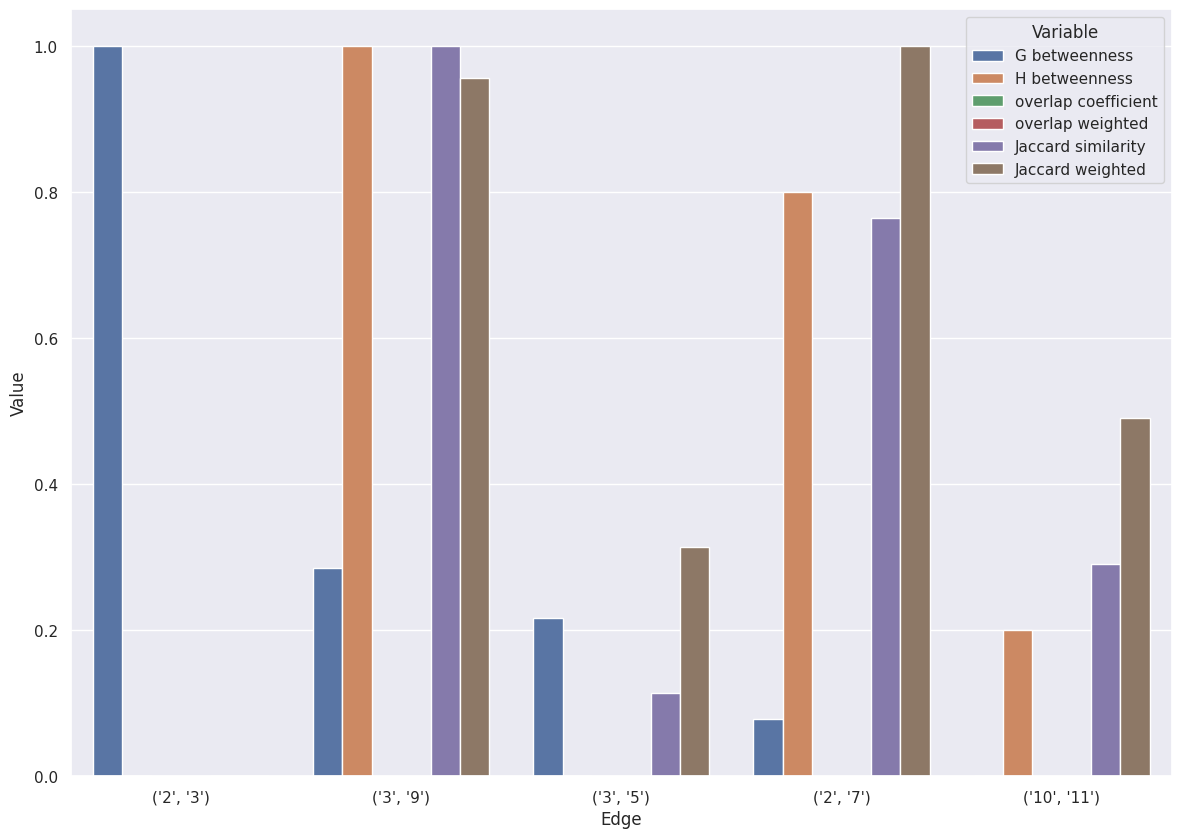

In [219]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("G betweenness", ascending=False)[:5]
# holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)
holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())
holy_simularity["edge"] = acc_df["edge"]
# holy_simularity.describe()
holy_simularity["edge"] = holy_simularity.index
# holy_simularity["edge"]


holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
holy_simularity
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# plt.xticks(rotation=30, horizontalalignment='right')
# plt.legend(ncol=2, title="")

In [228]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("H betweenness", ascending=False)[:5]
# holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)



holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity
# holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())

# holy_simularity["edge"] = acc_df["edge"]
# # holy_simularity.describe()
# holy_simularity["edge"] = holy_simularity.index
# # holy_simularity["edge"]


# holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
# holy_simularity
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# # plt.xticks(rotation=30, horizontalalignment='right')
# # plt.legend(ncol=2, title="")

,G betweenness,H betweenness,overlap coefficient,overlap weighted,Jaccard similarity,Jaccard weighted
edge,,,,,,
"(0, 5)",0.000000,0.037879,0.0,0.0,0.0,0.000000
"(1, 2)",0.000000,0.037879,0.0,0.0,0.0,0.000000
"(0, 3)",0.090909,0.037879,0.5,0.6,0.3,0.230769
"(0, 2)",0.000000,0.037879,0.0,0.0,0.0,0.000000
"(0, 4)",0.000000,0.037879,0.0,0.0,0.0,0.000000


<Axes: xlabel='Edge', ylabel='Value'>

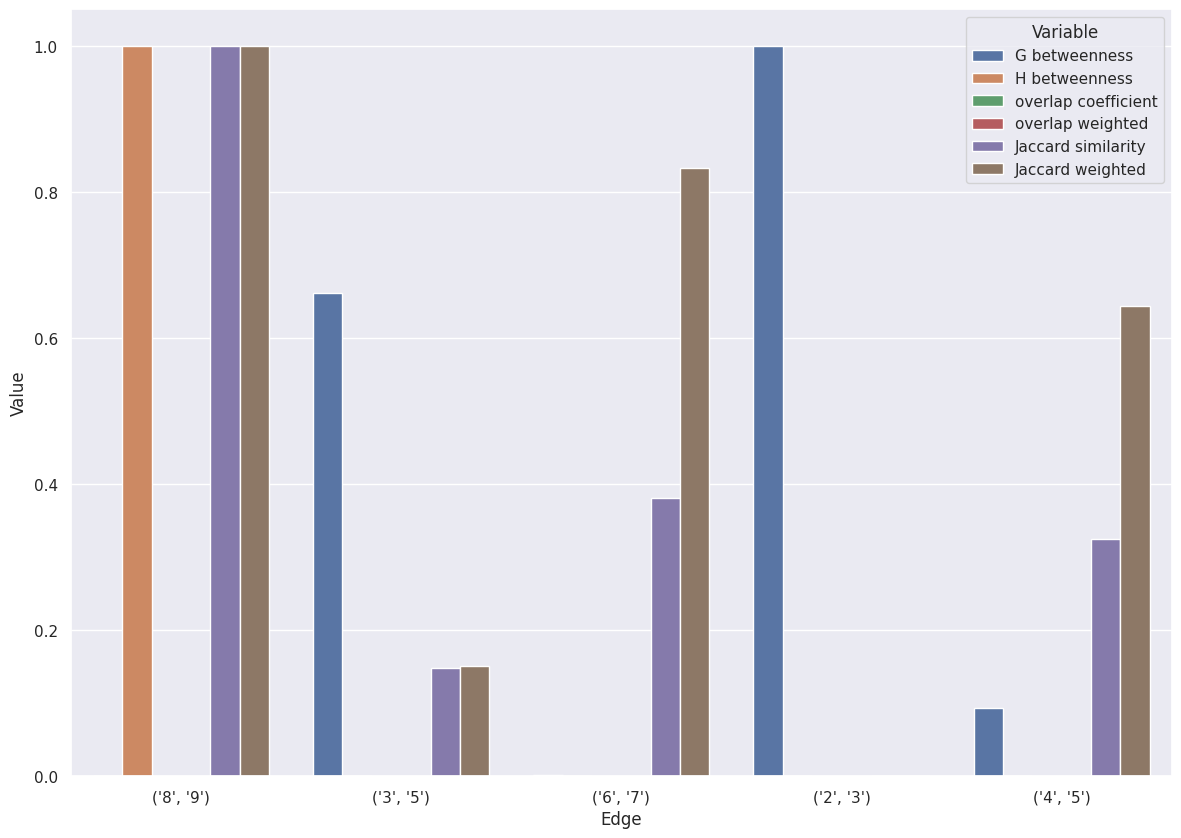

In [215]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("overlap coefficient", ascending=False)[:5]
holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)
holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())
holy_simularity["edge"] = acc_df["edge"]
# holy_simularity.describe()
holy_simularity["edge"] = holy_simularity.index
# holy_simularity["edge"]


holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
holy_simularity
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# plt.xticks(rotation=30, horizontalalignment='right')
# plt.legend(ncol=2, title="")

<Axes: xlabel='Edge', ylabel='Value'>

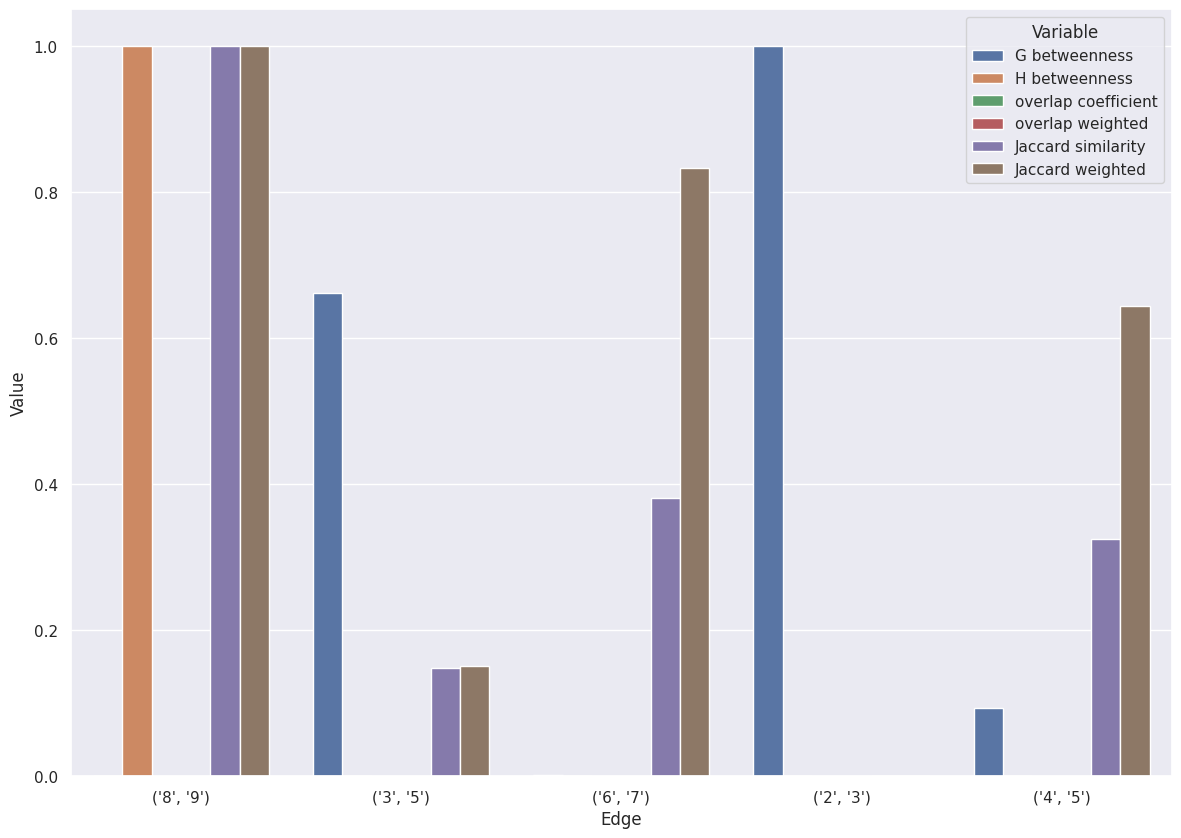

In [216]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("overlap weighted", ascending=False)[:5]
holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)
holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())
holy_simularity["edge"] = acc_df["edge"]
# holy_simularity.describe()
holy_simularity["edge"] = holy_simularity.index
# holy_simularity["edge"]


holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
holy_simularity
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# plt.xticks(rotation=30, horizontalalignment='right')
# plt.legend(ncol=2, title="")

<Axes: xlabel='Edge', ylabel='Value'>

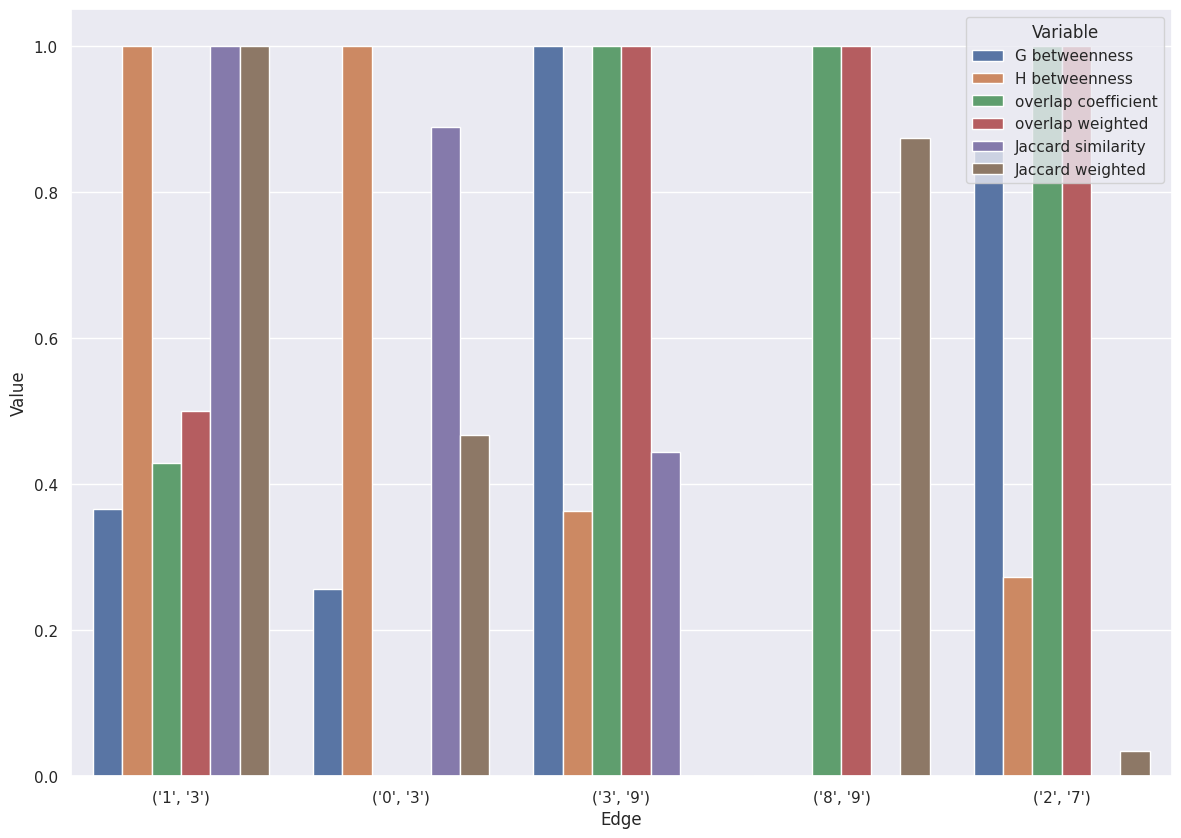

In [217]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("Jaccard similarity", ascending=False)[:5]
holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)
holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())
holy_simularity["edge"] = acc_df["edge"]
# holy_simularity.describe()
holy_simularity["edge"] = holy_simularity.index
# holy_simularity["edge"]


holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
holy_simularity
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# plt.xticks(rotation=30, horizontalalignment='right')
# plt.legend(ncol=2, title="")

<Axes: xlabel='Edge', ylabel='Value'>

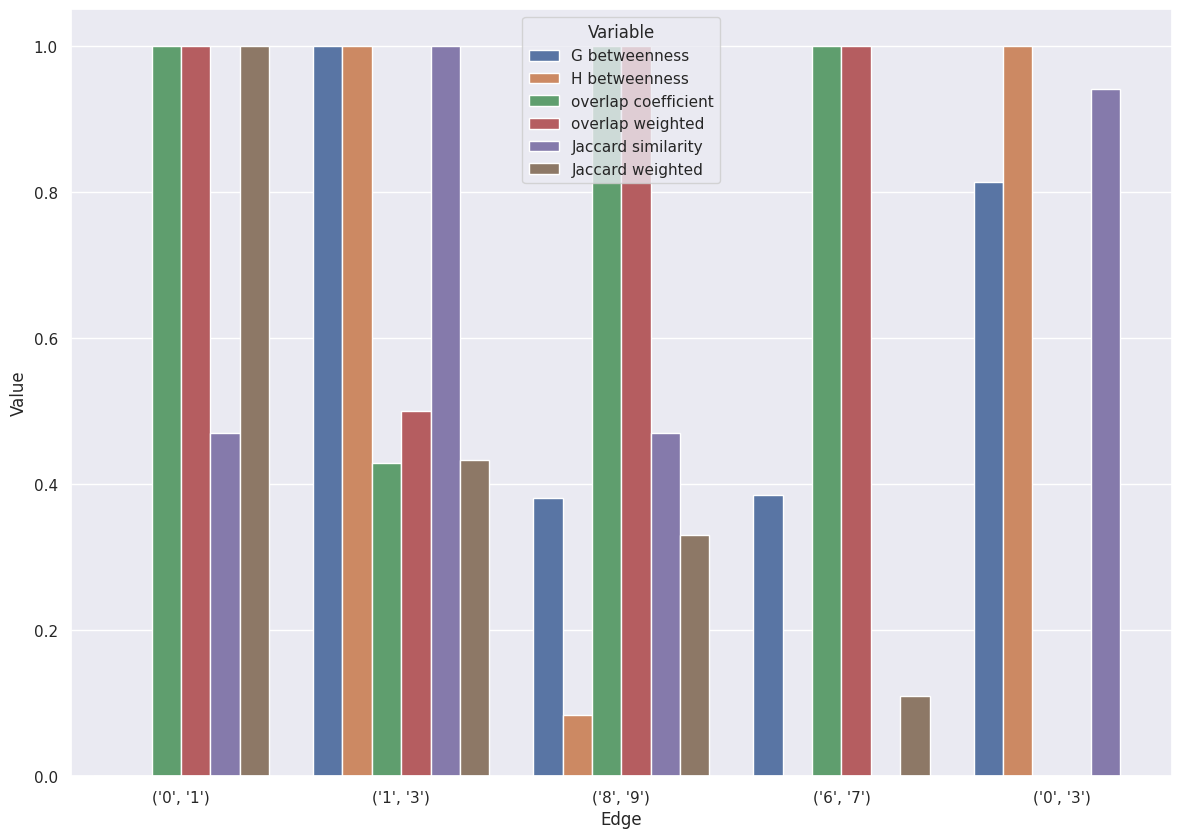

In [218]:
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity = holy_simularity.sort_values("Jaccard weighted", ascending=False)[:5]
holy_simularity = holy_simularity[holy_simularity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
holy_simularity = holy_simularity.fillna(0)
holy_simularity = holy_simularity.set_index(holy_simularity["edge"])[["G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted"]]
holy_simularity=(holy_simularity-holy_simularity.min())/(holy_simularity.max()-holy_simularity.min())
holy_simularity["edge"] = acc_df["edge"]
# holy_simularity.describe()
holy_simularity["edge"] = holy_simularity.index
# holy_simularity["edge"]


holy_simularity = holy_simularity.melt(id_vars="edge").rename(columns=str.title)
holy_simularity
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(holy_simularity, x='Edge', y='Value', hue='Variable')
# plt.xticks(rotation=30, horizontalalignment='right')
# plt.legend(ncol=2, title="")